# Breast Cancer: current status and machine learnig implications

#### 1. Introduction
###### Breast cancer is the most common female cancer in the world. Survival rate is inversly related to how early the diagnosis takes place: women who are diagnosed at earlier stages have higher chances to survive. Machine learning can be used to detect breast cancer from a simple blood tests and this in turn could significanltly increase the chances for survival. Additionally, ML could be used to classify diagnosed tumor solely by looking at the tissue image. Faster diagnosis would speed up the intitation of the treatment and decrease costs for additional medical tests.

#### 2. Datasets

##### 2.1 Dataset: Health mortality database 
https://www.who.int/healthinfo/statistics/mortality_rawdata/en/
- Possibly to use for descriptive statistic as introduction to the topic

##### 2.2 Dataset: CI5 XI: CANCER INCIDENCE IN FIVE CONTINENTS VOLUME XI 
http://ci5.iarc.fr/CI5-XI/Pages/download.aspx
- Possibly to use for descriptive statistic as introduction to the topic

##### 2.3 Dataste: World demogrpahics 
https://gco.iarc.fr/today/online-analysis-map?v=2018&mode=population&mode_population=continents&population=900&populations=900&key=asr&sex=0&cancer=39&type=0&statistic=5&prevalence=0&population_group=0&ages_group%5B%5D=0&ages_group%5B%5D=17&nb_items=5&group_cancer=1&include_nmsc=1&include_nmsc_other=1&projection=natural-earth&color_palette=default&map_scale=quantile&map_nb_colors=5&continent=0&rotate=%255B10%252C0%255D
- Possibly to use for descriptive statistic as introduction to the topic

##### 2.4 Dataset: Breast Cancer Coimbra:  
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra
- GOAL: Build a predictive model for potential application as a biomarker of breast cancer in a regular blood check.
- 10 quantitavie predictors, 1 binary variable collected from women with our without breast cancer
    a) Age (years)
    b) BMI (kg/m2)
    c) Glucose (mg/dL)
    d) Insulin (µU/mL)
    e) HOMA
    f) Leptin (ng/mL)
    g) Adiponectin (µg/mL)
    h) Resistin (ng/mL)
    i) MCP-1(pg/dL)
    j) Diagnosis

##### 2.5 Dataset: Breast Cancer Wisconsin Data Set: 
https://www.kaggle.com/uciml/breast-cancer-wisconsin-data
- GOAL: Build a predictive model to rapidly clasify breast cancer as malignant or benign based on microscopic features of diagnosed tumour tissue
- 10 real-valued features are computed for each cell nucleus:
-    a) Radius (mean of distances from center to points on the perimeter) 
-    b) Texture (standard deviation of gray-scale values) 
-    c) Perimeter 
-    d) Area 
-    e) Smoothness (local variation in radius lengths) 
-    f) Compactness (perimeter^2 / area - 1.0) 
-    g) Concavity (severity of concave portions of the contour) 
-    h) Concave points (number of concave portions of the contour) 
-    i) Symmetry 
-    j) Fractal dimension ("coastline approximation" - 1)

#### 3. Methodology
##### 3.1 Downloading the datastes: 
-    a) CSV Downloads
-    b) Web Scrapping for the demographic dataset
##### 3.1 Creating a database in MySQL
##### 3.2 Data cleaning, prepocessing  (Pandas, NumPy)
- Missing values
- Types
- Duplicates
##### 3.3 Descriptive statistics in Tableau : Dashboard
- Fig1. Map of the world - is there a change in occurance of breast cancer over time
- Fig2. Mortality vs Incidence rate
- Fig3. Survival rate - people icons
##### 3.4 Data visualisation in seaborn
- Histograms 
- Barplots
- Correlation matrix
##### 3.5 Machine leaerning: supervised learning  in scikit-learn:
Given a set of data points (blood parameters or size/shape) associated to outcome (diagnosis and tumour classification) build a classifier that learns how to predict the outcome from data points.
- Logistic Regression
- Nearest Neighbor
- Support Vector Machines
- Kernel SVM
- Naive Bayes
- Decision Tree Algorithm 
- Random Forest Classification

##### NOTES
- identify also drivers not only predictors.
- capture interactions - ranking which features would be the most important for predictions.
- not only the best models 
- how does the diagnosis happens normally, how my findings could improve

In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline

In [3]:
coimbra = pd.read_csv('Breast Cancer Coimbra Data Set.csv')
wisconsin = pd.read_csv('Wisconsin.csv')

In [5]:
coimbra.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [6]:
coimbra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
Age               116 non-null int64
BMI               116 non-null float64
Glucose           116 non-null int64
Insulin           116 non-null float64
HOMA              116 non-null float64
Leptin            116 non-null float64
Adiponectin       116 non-null float64
Resistin          116 non-null float64
MCP.1             116 non-null float64
Classification    116 non-null int64
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


In [8]:
coimbra.shape

(116, 10)

In [9]:
coimbra.describe()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000,1.551724
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663,0.499475
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,1.000000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474282,6.881763,269.978250,1.000000
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500,2.000000
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000,2.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,2.000000


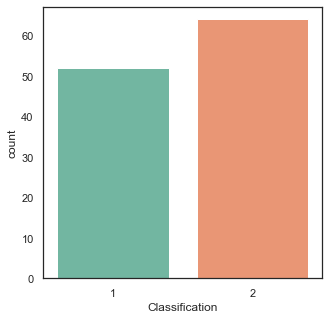

In [111]:
sns.set(rc={'figure.figsize':(5,5)})
sns.set_palette('Set2')
sns.set_style('white')
sns.countplot(data=coimbra,
              x='Classification')

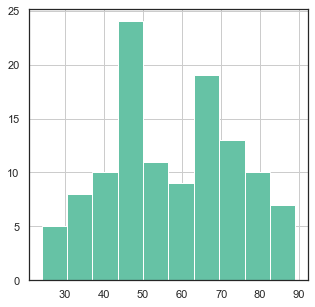

In [115]:
sns.set(rc={'figure.figsize':(5,5)})
sns.set_palette('Set2')
sns.set_style('white')
coimbra['Age'].hist()

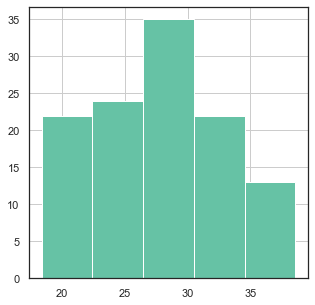

In [116]:
sns.set(rc={'figure.figsize':(5,5)})
sns.set_palette('Set2')
sns.set_style('white')
coimbra['BMI'].hist(bins =5)

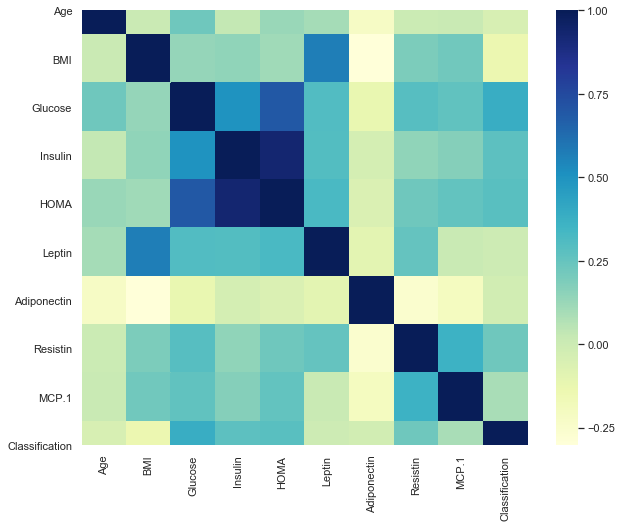

In [127]:
sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(data=coimbra.corr(),
            cmap="YlGnBu")

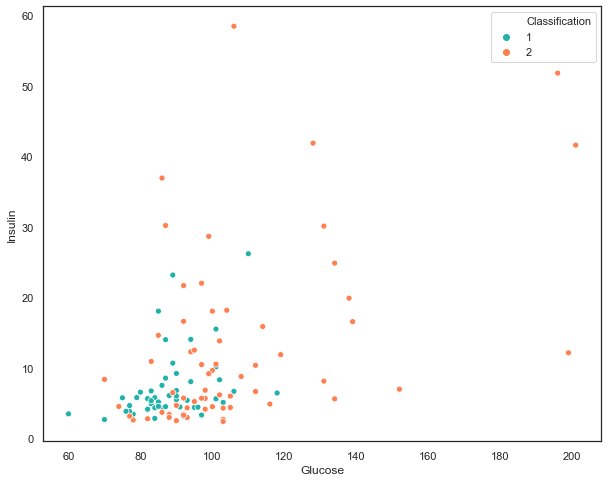

In [138]:
sns.set(rc={'figure.figsize':(10,8)})
sns.set_palette('YlGnBu')
sns.set_style('white')
ax = sns.scatterplot(x='Glucose',
                      y='Insulin',
                      data=coimbra,
                      ci = None,
                      hue='Classification', 
                     palette = ['lightseagreen', 'coral'] )
plt.xticks(rotation=0);